In [181]:
#importing packages

import requests
import pandas as pd
from bs4 import BeautifulSoup
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
from mplsoccer.pitch import Pitch, VerticalPitch
from mplsoccer.utils import FontManager

In [125]:
#scraping

main_url = 'https://understat.com/match/'
match_id = str(input("Insert the match id: "))

url = main_url + match_id

Insert the match id: 16599


In [126]:
url

'https://understat.com/match/16599'

In [127]:
res = requests.get(url)
soup = BeautifulSoup(res.content,'lxml')
scripts = soup.find_all('script')

In [128]:
#shot data
strings = scripts[1].string

In [129]:
#strip symbols to have json data

ind_start = strings.index("('")+2
ind_end = strings.index("')")

json_data = strings[ind_start:ind_end]
json_data = json_data.encode('utf8').decode('unicode_escape')

#convert string to json format
data = json.loads(json_data)

In [130]:
x = []
y = []
xg = []
team = []
result = []

data_away = data['a']
data_home = data['h']

for index in range(len(data_home)):
    for key in data_home[index]:
        if key =='X':
            x.append(data_home[index][key])
        if key =='Y':
            y.append(data_home[index][key])
        if key =='xG':
            xg.append(data_home[index][key])
        if key == 'h_team':
            team.append(data_home[index][key])
        if key == "result":
            result.append(data_home[index][key])
            
for index in range(len(data_away)):
    for key in data_away[index]:
        if key =='X':
            x.append(data_away[index][key])
        if key =='Y':
            y.append(data_away[index][key])
        if key =='xG':
            xg.append(data_away[index][key])
        if key == 'a_team':
            team.append(data_away[index][key])
        if key == "result":
            result.append(data_away[index][key])

In [131]:
#dataframe

cols = ['x','y','xg','team','result'] # column names
df = pd.DataFrame([x,y,xg,team,result],index=cols) #creating dataframe
df = df.T #transpose the dataframe

In [132]:
df.head()

,x,y,xg,team,result
0,0.9130000305175782,0.3970000076293945,0.08086203038692474,Crystal Palace,SavedShot
1,0.9269999694824219,0.335,0.2938612401485443,Crystal Palace,SavedShot
2,0.955999984741211,0.47,0.6055403351783752,Crystal Palace,MissedShots
3,0.9569999694824218,0.46700000762939453,0.10185090452432632,Crystal Palace,SavedShot
4,0.919000015258789,0.5379999923706055,0.4071469008922577,Crystal Palace,Goal


In [133]:
df['x']= (pd.to_numeric(df['x'])/100)*120*100

In [134]:
df['y']= (pd.to_numeric(df['y'])/100)*80*100

In [135]:
df['xg'] = pd.to_numeric(df['xg'])

In [165]:
df_missed = df[(df.team=="Liverpool") & (df.result=="MissedShots")]
df_saved = df[(df.team=="Liverpool") & (df.result=="SavedShot")]
df_goal = df[(df.team=="Liverpool") & (df.result=="Goal")]
df_blocked = df[(df.team=="Liverpool") & (df.result=="BlockedShot")]

## Visualization

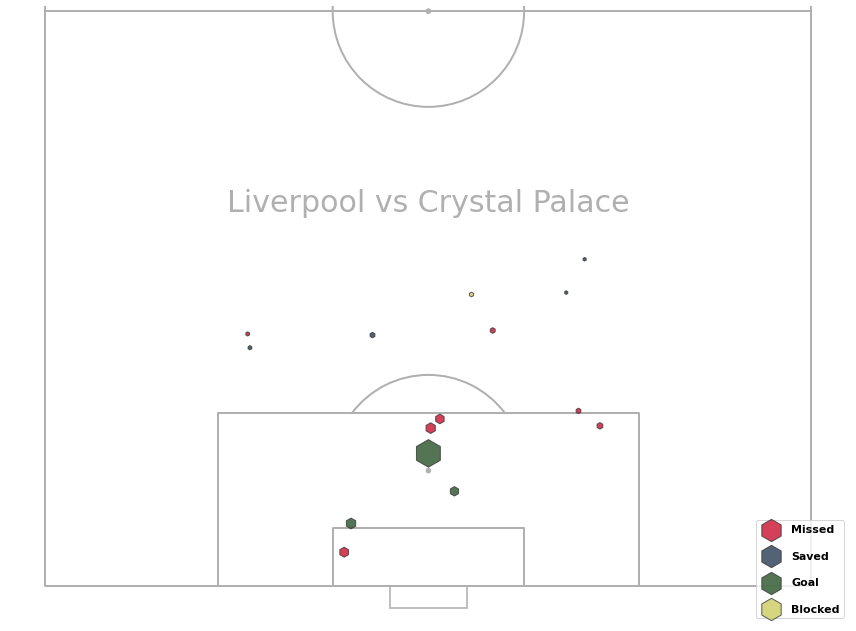

In [204]:

pitch = VerticalPitch(pad_bottom=0.5,  # pitch extends slightly below halfway line
                      half=True,  # half of a pitch
                      goal_type='box',
                      goal_alpha=0.8)  # control the goal transparency

fig, ax = pitch.draw(figsize=(12, 10))
plt.gca().invert_yaxis()

sc = pitch.scatter(df_missed["x"],df_missed["y"],
                   # size varies between 100 and 1000 (points squared)
                   s=(df_missed["xg"] * 1000),
                   alpha=.8,
                   c='#C8102E',  # color for scatter in hex format
                   edgecolors='#383838',  # give the markers a charcoal border
                   marker='h',label="Missed",
                   ax=ax)

sc1 = pitch.scatter(df_saved["x"],df_saved["y"],
                   # size varies between 100 and 1000 (points squared)
                   s=(df_saved["xg"] * 1000),
                   alpha=.8,
                   c='#283b52',  # color for scatter in hex format
                   edgecolors='#383838',  # give the markers a charcoal border
                   marker='h',label="Saved",
                   ax=ax)

sc2 = pitch.scatter(df_goal["x"],df_goal["y"],
                   # size varies between 100 and 1000 (points squared)
                   s=(df_goal["xg"] * 1000),
                   alpha=.8,
                   c='#285229',  # color for scatter in hex format
                   edgecolors='#383838',  # give the markers a charcoal border
                   marker='h',label="Goal",
                   ax=ax)

sc3 = pitch.scatter(df_blocked["x"],df_blocked["y"],
                   # size varies between 100 and 1000 (points squared)
                   s=(df_blocked["xg"] * 1000),
                   alpha=.8,
                   c='#cccc62',  # color for scatter in hex format
                   edgecolors='#383838',  # give the markers a charcoal border
                   marker='h',
                   ax=ax,label="Blocked")

#making legends equal size
legend = ax.legend(loc="lower right",labelspacing=1.5,prop={'weight':'bold','size':11})
legend.legendHandles[0]._sizes = [500]
legend.legendHandles[1]._sizes = [500]
legend.legendHandles[2]._sizes = [500]
legend.legendHandles[3]._sizes = [500]

txt = ax.text(x=40, y=80, s='Liverpool vs Crystal Palace',
              size=30,
              color=pitch.line_color,
              va='center', ha='center')